#### Lesson: Growth in Dynamic Linear Economies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import LQ, DLE

In [2]:
# Parameter Matrices
γ_1 = 0.1
ϕ_1 = 1e-5

ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k = (np.array([[1], [0]]),
                              np.array([[0], [1]]),
                              np.array([[1], [-ϕ_1]]),
                              np.array([[γ_1], [0]]),
                              np.array([[.95]]),
                              np.array([[1]]))

β, l_λ, π_h, δ_h, θ_h = (np.array([[1 / 1.05]]),
                         np.array([[0]]),
                         np.array([[1]]),
                         np.array([[.9]]),
                         np.array([[1]]) - np.array([[.9]]))

a22, c2, ub, ud = (np.array([[1,   0,   0],
                             [0, 0.8,   0],
                             [0,   0, 0.5]]),
                   np.array([[0, 0],
                             [1, 0],
                             [0, 1]]),
                   np.array([[30, 0, 0]]),
                   np.array([[5, 1, 0],
                             [0, 0, 0]]))

# Initial condition
x0 = np.array([[5], [150], [1], [0], [0]])

info1 = (a22, c2, ub, ud)
tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
pref1 = (β, l_λ, π_h, δ_h, θ_h)

In [3]:
econ1 = DLE(info1, tech1, pref1)

In [4]:
econ1.compute_sequence(x0, ts_length=300)

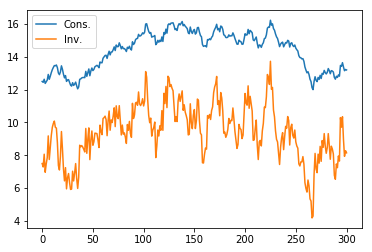

In [5]:
# This is the right panel of Fig 5.7.1 from p.105 of HS2013
plt.plot(econ1.c[0], label='Cons.')
plt.plot(econ1.i[0], label='Inv.')
plt.legend()
plt.show()

In [6]:
econ1.endo, econ1.exo

(array([0.9, 1. ]), array([1. , 0.8, 0.5]))

In [7]:
econ1.endo[1]

0.9999999999904767

In [8]:
econ1.compute_steadystate()
np.set_printoptions(precision=3, suppress=True)
print(econ1.css, econ1.iss, econ1.kss)

[[4.999]] [[-0.001]] [[-0.022]]


In [9]:
γ2 = 0.15
γ22 = np.array([[γ2], [0]])

ϕ_12 = 1
ϕ_i2 = np.array([[1], [-ϕ_12]])

tech2 = (ϕ_c, ϕ_g, ϕ_i2, γ22, δ_k, θ_k)

x02 = np.array([[5], [20], [1], [0], [0]])

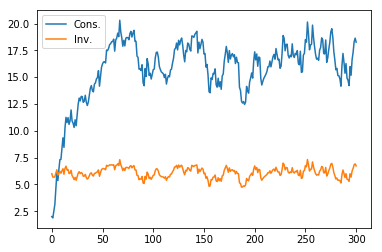

In [10]:
econ2 = DLE(info1, tech2, pref1)

econ2.compute_sequence(x02, ts_length=300)

plt.plot(econ2.c[0], label='Cons.')
plt.plot(econ2.i[0], label='Inv.')
plt.legend()
plt.show()

In [11]:
econ2.compute_steadystate()
print(econ2.css, econ2.iss, econ2.kss)

[[17.5]] [[6.25]] [[125.]]


In [12]:
econ2.endo, econ2.exo

(array([0.9  , 0.952]), array([1. , 0.8, 0.5]))

In [13]:
l_λ2 = np.array([[-1]])
pref2 = (β, l_λ2, π_h, δ_h, θ_h)

In [14]:
econ3 = DLE(info1, tech1, pref2)

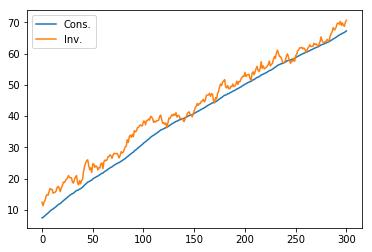

In [15]:
econ3.compute_sequence(x0, ts_length=300)

# This is the right panel of Fig 5.10.1 from p.110 of HS2013
plt.plot(econ3.c[0], label='Cons.')
plt.plot(econ3.i[0], label='Inv.')
plt.legend()
plt.show()

In [16]:
econ3.endo, econ3.exo

(array([1.+0.j, 1.-0.j]), array([1. , 0.8, 0.5]))

In [17]:
econ3.endo, econ3.exo

(array([1.+0.j, 1.-0.j]), array([1. , 0.8, 0.5]))

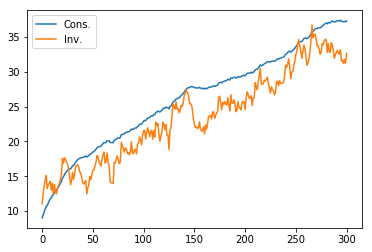

In [18]:
l_λ3 = np.array([[-0.7]])
pref3 = (β, l_λ3, π_h, δ_h, θ_h)

econ4 = DLE(info1, tech1, pref3)

econ4.compute_sequence(x0, ts_length=300)

plt.plot(econ4.c[0], label='Cons.')
plt.plot(econ4.i[0], label='Inv.')
plt.legend()
plt.show()

In [19]:
econ4.endo, econ4.exo

(array([0.97, 1.  ]), array([1. , 0.8, 0.5]))

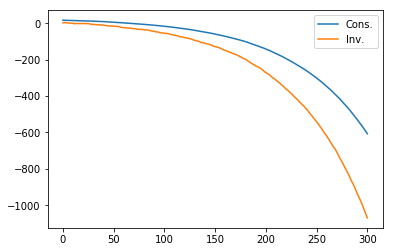

In [20]:
β_2 = np.array([[0.94]])
pref4 = (β_2, l_λ, π_h, δ_h, θ_h)

econ5 = DLE(info1, tech1, pref4)

econ5.compute_sequence(x0, ts_length=300)

plt.plot(econ5.c[0], label='Cons.')
plt.plot(econ5.i[0], label='Inv.')
plt.legend()
plt.show()

In [21]:
econ5.endo, econ5.exo

(array([0.9  , 1.013]), array([1. , 0.8, 0.5]))

#### Lesson: Lucas Asset Pricing Using DLE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
from quantecon import DLE
%matplotlib inline

In [2]:
gam = 0
γ = np.array([[gam], [0]])
ϕ_c = np.array([[1], [0]])
ϕ_g = np.array([[0], [1]])
ϕ_1 = 1e-4
ϕ_i = np.array([[0], [-ϕ_1]])
δ_k = np.array([[.95]])
θ_k = np.array([[1]])
β = np.array([[1 / 1.05]])
ud = np.array([[5, 1, 0],
               [0, 0, 0]])
a22 = np.array([[1,   0,    0],
                [0, 0.8,    0],
                [0,   0, 0.5]])
c2 = np.array([[0, 1, 0],
               [0, 0, 1]]).T
l_λ = np.array([[0]])
π_h = np.array([[1]])
δ_h = np.array([[.9]])
θ_h = np.array([[1]]) - δ_h
ub = np.array([[30, 0, 0]])
x0 = np.array([[5, 150, 1, 0, 0]]).T

info1 = (a22, c2, ub, ud)
tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
pref1 = (β, l_λ, π_h, δ_h, θ_h)

econ1 = DLE(info1, tech1, pref1)



In [3]:
econ1.compute_sequence(x0, ts_length=100, Pay=np.array([econ1.Sd[0, :]]))

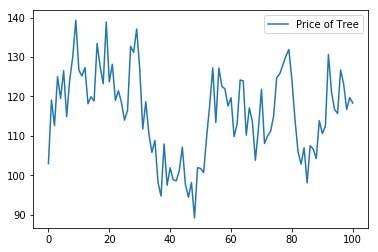

In [4]:
### Fig 7.12.1 from p.147 of HS2013
plt.plot(econ1.Pay_Price, label='Price of Tree')
plt.legend()
plt.show()

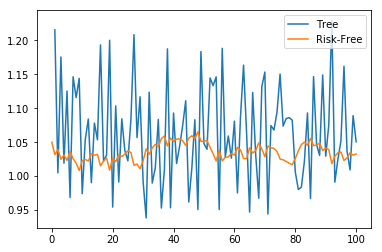

In [5]:
### Left panel of Fig 7.12.2 from p.148 of HS2013
plt.plot(econ1.Pay_Gross, label='Tree')
plt.plot(econ1.R1_Gross, label='Risk-Free')
plt.legend()
plt.show()

In [6]:
np.corrcoef(econ1.Pay_Gross[1:, 0], econ1.R1_Gross[1:, 0])

array([[ 1.        , -0.44813448],
       [-0.44813448,  1.        ]])